# Forêts aléatoires dans un contexte de classification

## Human Activity Recognition

Le but de ce projet est de **prédire le type d'activité d'une personne** (variable `Activity`) en fonction de diverses mesures obtenues à l'aide de senseurs. Les différentes activités sont:
- STANDING (être debout)
- SITTING (être assis)
- LAYING (être couché)
- WALKING (marcher)
- WALKING_DOWNSTAIRS (marcher vers le bas)
- WALKING_UPSTAIRS  (marcher vers le haut)

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

## Exercice


### Load Data
1. Loadez les data.<br>
   ```
   train_df = pd.read_csv('./data/HumanActivity/train.csv')
   test_df = pd.read_csv('./data/HumanActivity/test.csv')
   ```


### Data Analysis
2. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```


3. Visualisez la répartition des valeurs de la variable `Activity` à prédire:<br> 
   ```
   sns.countplot(train_df.Activity, order=train_df.Activity.value_counts().index)
   ```


4. **Principal Component Analysis (PCA)** est une méthode qui réduit la dimension des data selon un critère de maximisation d'explicabilité de leur variance...<br>
   Effectuez une PCA de dimension 2 sur votre train set (sans les colonnes `Activity` et `subject`) et visualisez vos data de dimensions réduites:<br>
   ```
   # PCA
   ...
   pca = PCA(n_components=2, random_state=0).fit_transform(X_train_modified)
   # plot
   ...
   sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train_df['Activity'])
   ...
   ```
   
   
5. **t-Distributed Stochastic Neighbor Embedding (t-SNE)** est une méthode plus avancée que PCA pour la réduction de dimension, et donc la visualisation des data.<br>
   Effectuez un t-SNE de dimension 2 sur votre train set (sans les colonnes `Activity` et `subject`) et visualisez vos data de dimensions réduites:<br>
      ```
   # t-SNE
   ...
   tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(X_train_modified)
   # plot
   ...
   sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train_df['Activity'])
   ...
   ```

### Data Preprocessing and Splitting
6. Obtenez les **features** `X` et les **targets** `y` à partir de votre dataframe.<br>
    Les **features** corrrespondent à toutes les colonnes sauf `Activity` et `subject`.<br>
    Les **targets** corrrespondent à la colonne `Activity`.<br>
    Utilisez `df.drop(...)`.


7. Dans le cas présent, il n'y a pas besoin de splittez les data en un **train set** et un **test set**, car ceci est déjà effectué...


### Model and Results
8. Instanciez et entraînez une **forêt aléatoire** `RandomForestClassifier` sur vos data:<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


9. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    


### Hyperparameter Tuning
11. Utilisez technique de **grid search** avec **cross validation** pour optimiser les hyperparamètres de votre random forest (prend du temps).<br>
    Faites varier les paramètres du modèle au sein des valeurs suivantes:<br>
    ```
    rf_params = {"max_depth": [3, 5, 8, None],
             "max_features": [3, 5, 10],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 3, 5, 10],
             "bootstrap": [True, False],
             "n_estimators": [100, 500, 1000],
             "random_state": [42]}
    ```
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [3]:
train_df = pd.read_csv('./data/HumanActivity/train.csv')
test_df = pd.read_csv('./data/HumanActivity/test.csv')

In [4]:
train_df.shape, test_df.shape

((7352, 563), (2947, 563))

In [5]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Data Analysis

In [6]:
train_df.duplicated().sum()

np.int64(0)

In [8]:
train_df.isna().values.sum()

np.int64(0)

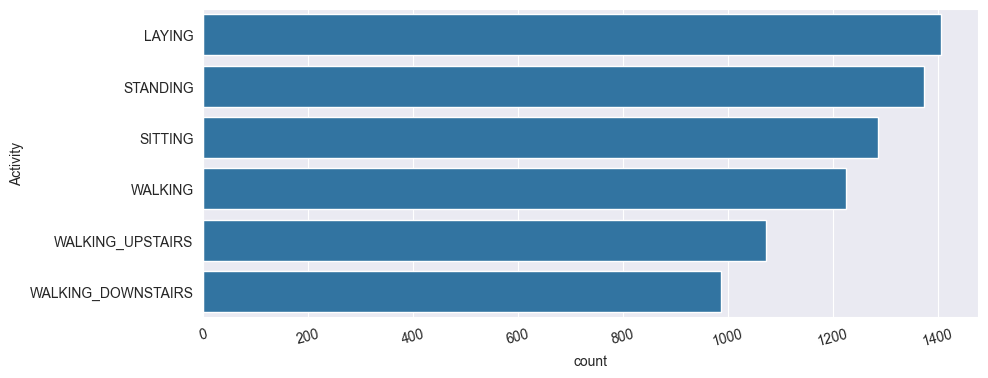

In [11]:
plt.figure(figsize=(10, 4))

sns.countplot(train_df.Activity, order=train_df.Activity.value_counts().index)
plt.xticks(rotation = 15)

plt.show()

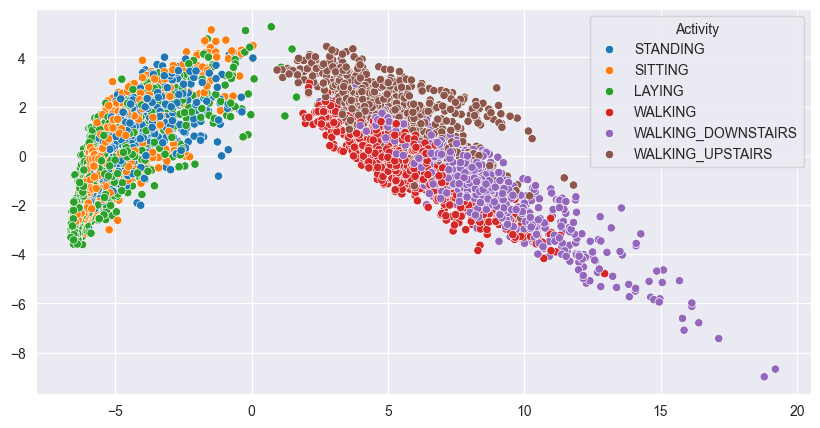

In [15]:
X_train_modified = train_df.drop(['subject', 'Activity'], axis=1)
pca = PCA(n_components=2, random_state=0).fit_transform(X_train_modified)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train_df['Activity'])
plt.show()

In [17]:
X_tsne = train_df.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, max_iter=1000).fit_transform(X_tsne)
tsne

array([[ -6.357672,  62.704525],
       [-25.428144,  17.03193 ],
       [-27.190758,  20.238298],
       ...,
       [ 22.866102,  59.438   ],
       [ 22.850883,  59.17455 ],
       [ 23.356674,  58.425007]], shape=(7352, 2), dtype=float32)

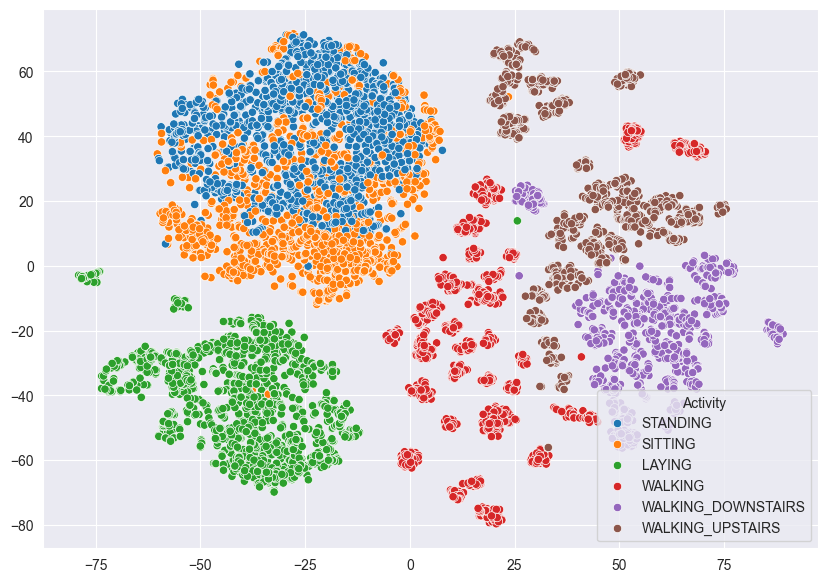

In [18]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train_df['Activity'])
plt.show()


## Data Preprocessing and Splitting

In [10]:
X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df.Activity

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df.Activity

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

## Model and Results

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Score: ', rf_score)

In [ ]:

# classification table for the test set
print(classification_report(y_test, y_test_preds))

## Hyperparameter Tuning